# Explore heuristic values for an empty maze

In [106]:
if(!"proxy" %in% rownames(installed.packages())) 
    install.packages("proxy", repos="http://cran.us.r-project.org")
library(proxy)

options(digits = 2)

Define an empty $10 \times 10$ maze and place start and goal. 
__Note:__ indices start with 1 in R!

In [107]:
n <- 10
start <- cbind(2, 2)
goal <- cbind(9, 9)

maze <- matrix(" ", nrow = n, ncol = n)
maze[start] <- "S"
maze[goal] <- "G"
print(maze)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [2,] " "  "S"  " "  " "  " "  " "  " "  " "  " "  " "  
 [3,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [4,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [5,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [6,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [7,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [8,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  
 [9,] " "  " "  " "  " "  " "  " "  " "  " "  "G"  " "  
[10,] " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  


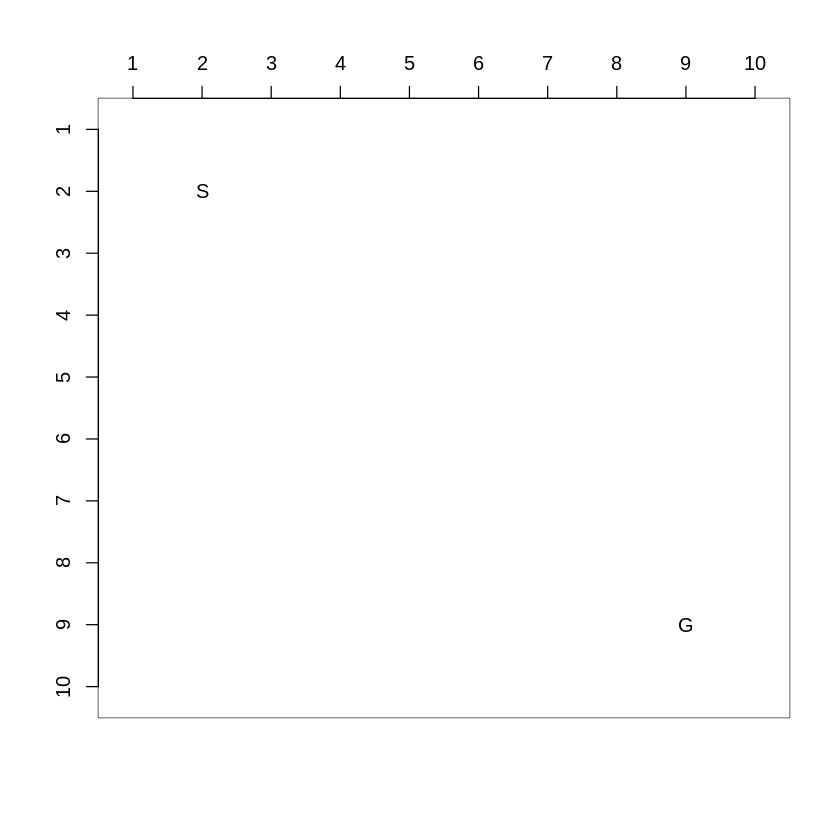

In [138]:
myimage <- function(x, ...){
    image(x[,n:1], xaxt = "n", yaxt = "n", ...)
    axis(3, at = (0:(n-1))/(n-1), labels = 1:n)
    axis(2, at = (0:(n-1))/(n-1), labels = n:1)
    
    text((goal[2]-1)/(n-1),1-(goal[1]-1)/(n-1), "G")
    text((start[2]-1)/(n-1),1-(start[1]-1)/(n-1), "S")
}

myimage(maze != "", col = "white")

## GBFS: Use Manhattan Distance for $h(n)$

Manhattan distance is the difference in x values plus the differences in y values. 

Manhattan distance is a perfect heuristic for the maze! $h(n) = h^*(n)$ and $f(n) = f^*(n)$ (the asterisk represents the optimal value).

Calculate $h(n)$

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   16   15   14   13   12   11   10    9    8     9
 [2,]   15   14   13   12   11   10    9    8    7     8
 [3,]   14   13   12   11   10    9    8    7    6     7
 [4,]   13   12   11   10    9    8    7    6    5     6
 [5,]   12   11   10    9    8    7    6    5    4     5
 [6,]   11   10    9    8    7    6    5    4    3     4
 [7,]   10    9    8    7    6    5    4    3    2     3
 [8,]    9    8    7    6    5    4    3    2    1     2
 [9,]    8    7    6    5    4    3    2    1    0     1
[10,]    9    8    7    6    5    4    3    2    1     2

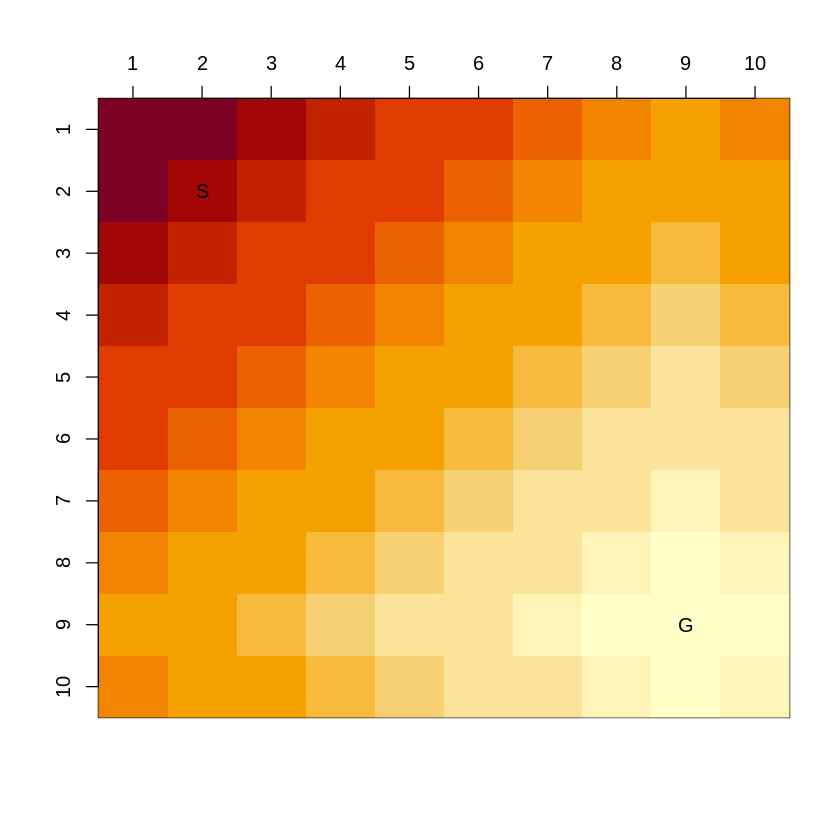

In [109]:
h_manhattan <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), goal, method = "manhattan"))
h_manhattan

myimage(h_manhattan)

The algorithm will follow the color gradient from dark red to light yellow.

## A* with Manhattan heuristic

Calculate $f(n) = g(n) + h(n)$ 

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   18   16   16   16   16   16   16   16   16    18
 [2,]   16   14   14   14   14   14   14   14   14    16
 [3,]   16   14   14   14   14   14   14   14   14    16
 [4,]   16   14   14   14   14   14   14   14   14    16
 [5,]   16   14   14   14   14   14   14   14   14    16
 [6,]   16   14   14   14   14   14   14   14   14    16
 [7,]   16   14   14   14   14   14   14   14   14    16
 [8,]   16   14   14   14   14   14   14   14   14    16
 [9,]   16   14   14   14   14   14   14   14   14    16
[10,]   18   16   16   16   16   16   16   16   16    18

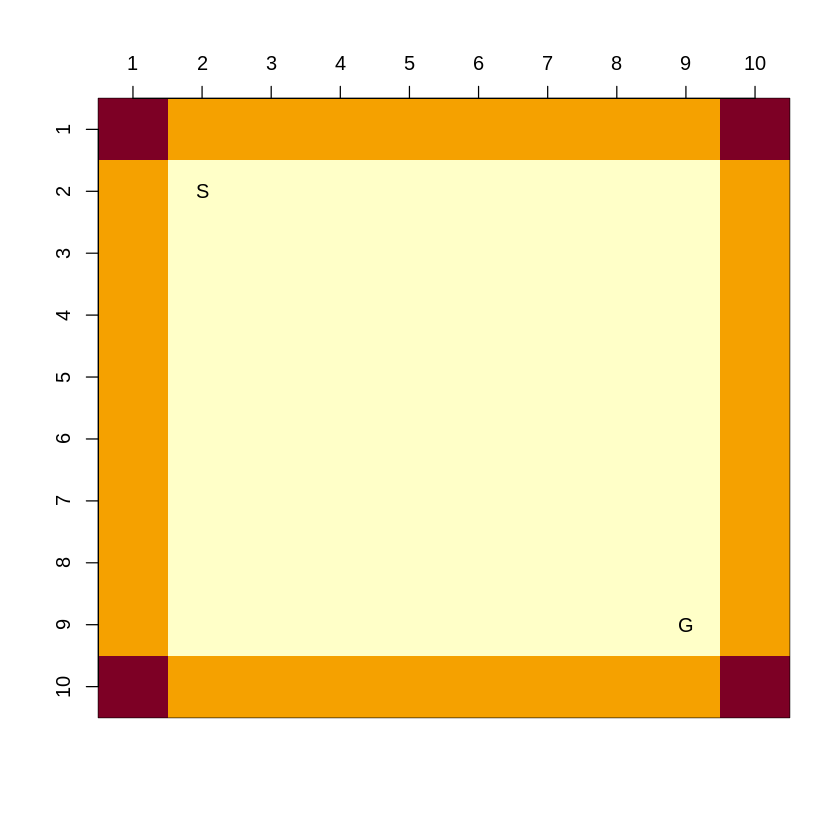

In [110]:
g <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), start, method = "manhattan"))
f <- g + h_manhattan      
f
           
myimage(f)

__Note:__ since the heuristic is perfect, and the geometry of Manhattan distance, almost all squares have exactly the same $f(n)$! That means the agent can get lost on the plateau. All directions will be tied and the way we break ties is important!

## GBFS with Euclidean Distance for $h(n)$

Euclidean distance is not perfect with $h(n) \le h^*(n)$ and $f(n) \le f^*(n)$

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 11.3 10.6 10.0  9.4  8.9  8.5  8.2  8.1  8.0   8.1
 [2,] 10.6  9.9  9.2  8.6  8.1  7.6  7.3  7.1  7.0   7.1
 [3,] 10.0  9.2  8.5  7.8  7.2  6.7  6.3  6.1  6.0   6.1
 [4,]  9.4  8.6  7.8  7.1  6.4  5.8  5.4  5.1  5.0   5.1
 [5,]  8.9  8.1  7.2  6.4  5.7  5.0  4.5  4.1  4.0   4.1
 [6,]  8.5  7.6  6.7  5.8  5.0  4.2  3.6  3.2  3.0   3.2
 [7,]  8.2  7.3  6.3  5.4  4.5  3.6  2.8  2.2  2.0   2.2
 [8,]  8.1  7.1  6.1  5.1  4.1  3.2  2.2  1.4  1.0   1.4
 [9,]  8.0  7.0  6.0  5.0  4.0  3.0  2.0  1.0  0.0   1.0
[10,]  8.1  7.1  6.1  5.1  4.1  3.2  2.2  1.4  1.0   1.4

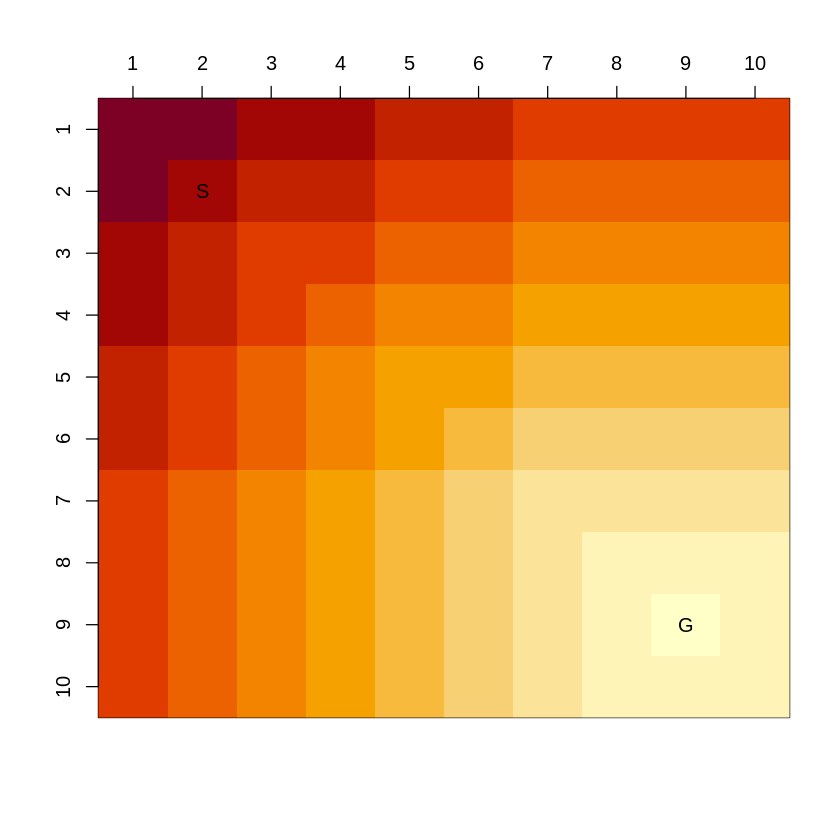

In [111]:
h_euclidean <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), goal, method = "euclidean"))
h_euclidean

myimage(h_euclidean)

## A* with Euclidean Distance for $h(n)$

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 13.3 11.6 12.0 12.4 12.9 13.5 14.2 15.1 16.0  17.1
 [2,] 11.6  9.9 10.2 10.6 11.1 11.6 12.3 13.1 14.0  15.1
 [3,] 12.0 10.2 10.5 10.8 11.2 11.7 12.3 13.1 14.0  15.1
 [4,] 12.4 10.6 10.8 11.1 11.4 11.8 12.4 13.1 14.0  15.1
 [5,] 12.9 11.1 11.2 11.4 11.7 12.0 12.5 13.1 14.0  15.1
 [6,] 13.5 11.6 11.7 11.8 12.0 12.2 12.6 13.2 14.0  15.2
 [7,] 14.2 12.3 12.3 12.4 12.5 12.6 12.8 13.2 14.0  15.2
 [8,] 15.1 13.1 13.1 13.1 13.1 13.2 13.2 13.4 14.0  15.4
 [9,] 16.0 14.0 14.0 14.0 14.0 14.0 14.0 14.0 14.0  16.0
[10,] 17.1 15.1 15.1 15.1 15.1 15.2 15.2 15.4 16.0  17.4

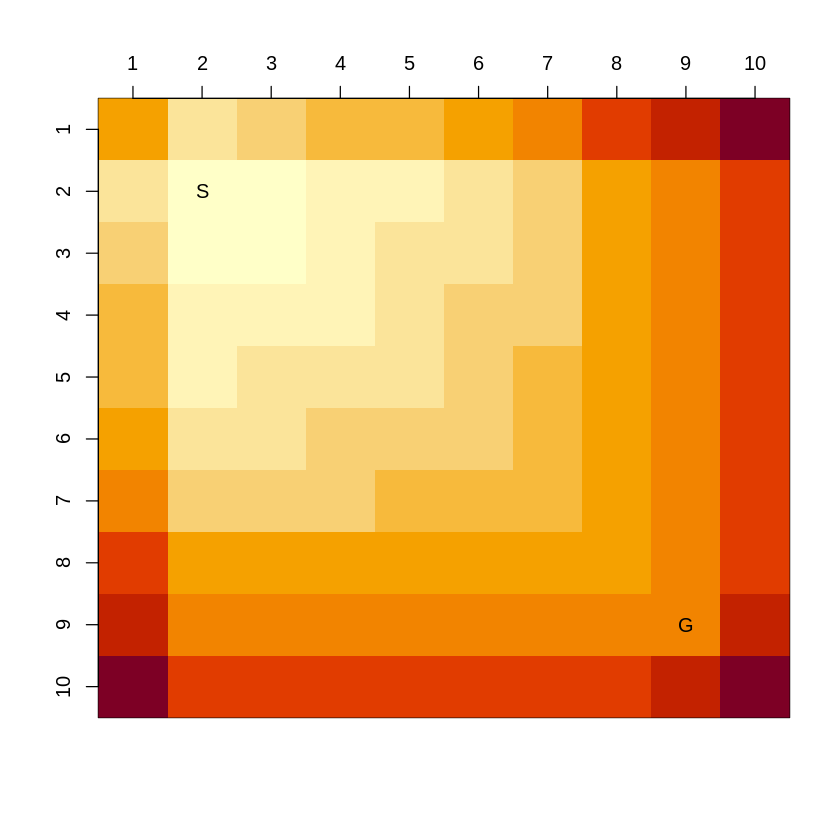

In [130]:
f <- g + h_euclidean
f

myimage(f)

__Note:__ Euclidean and Manhattan space do not mix well! The gradient is actually from goal to start!

A* expands all nodes with $f(n)<C^*$ and some with $f(n) \leq C^*$ shown below in light grey.

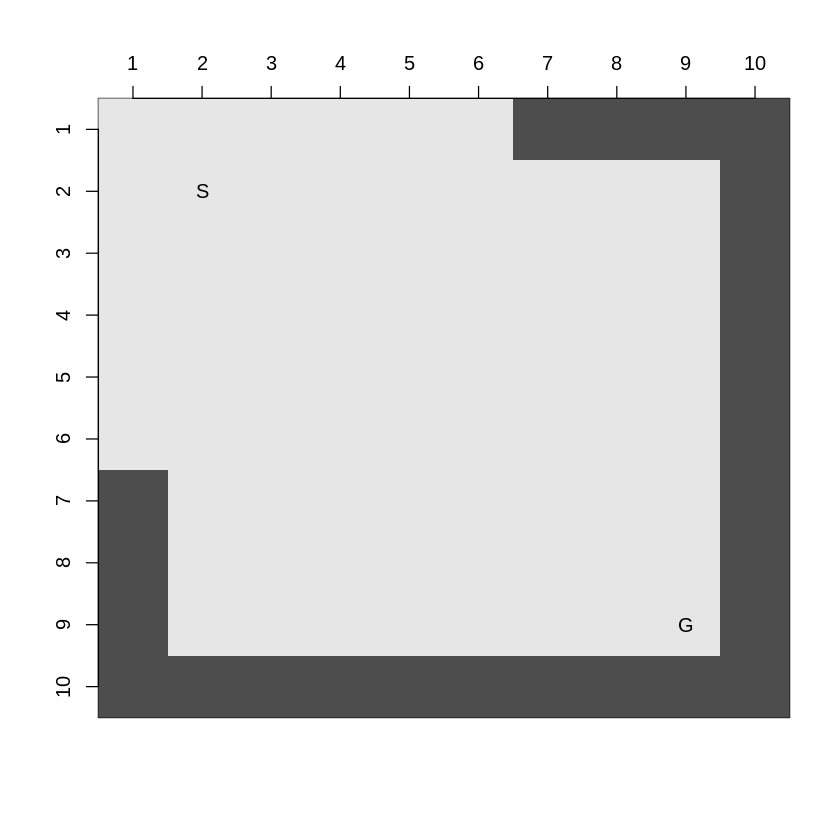

In [131]:
myimage(f <= f[goal], col = grey.colors(2))

## What if we could also move diagonally at the cost of $\sqrt{2} \approx 1.414$?

Now Euclidean distance makes more sense for and the heuristic below works perfectly. To make my code simpler, I also use Euclidean distance for g, although that is not completely correct, because we cannot move at any angle!

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 12.7 11.6 11.4 11.7 12.1 12.7 13.3 14.1 15.1  16.1
 [2,] 11.6  9.9 10.2 10.6 11.1 11.6 12.3 13.1 14.0  15.1
 [3,] 11.4 10.2  9.9 10.0 10.4 10.8 11.4 12.2 13.1  14.1
 [4,] 11.7 10.6 10.0  9.9 10.0 10.3 10.8 11.4 12.3  13.3
 [5,] 12.1 11.1 10.4 10.0  9.9 10.0 10.3 10.8 11.6  12.7
 [6,] 12.7 11.6 10.8 10.3 10.0  9.9 10.0 10.4 11.1  12.1
 [7,] 13.3 12.3 11.4 10.8 10.3 10.0  9.9 10.0 10.6  11.7
 [8,] 14.1 13.1 12.2 11.4 10.8 10.4 10.0  9.9 10.2  11.4
 [9,] 15.1 14.0 13.1 12.3 11.6 11.1 10.6 10.2  9.9  11.6
[10,] 16.1 15.1 14.1 13.3 12.7 12.1 11.7 11.4 11.6  12.7

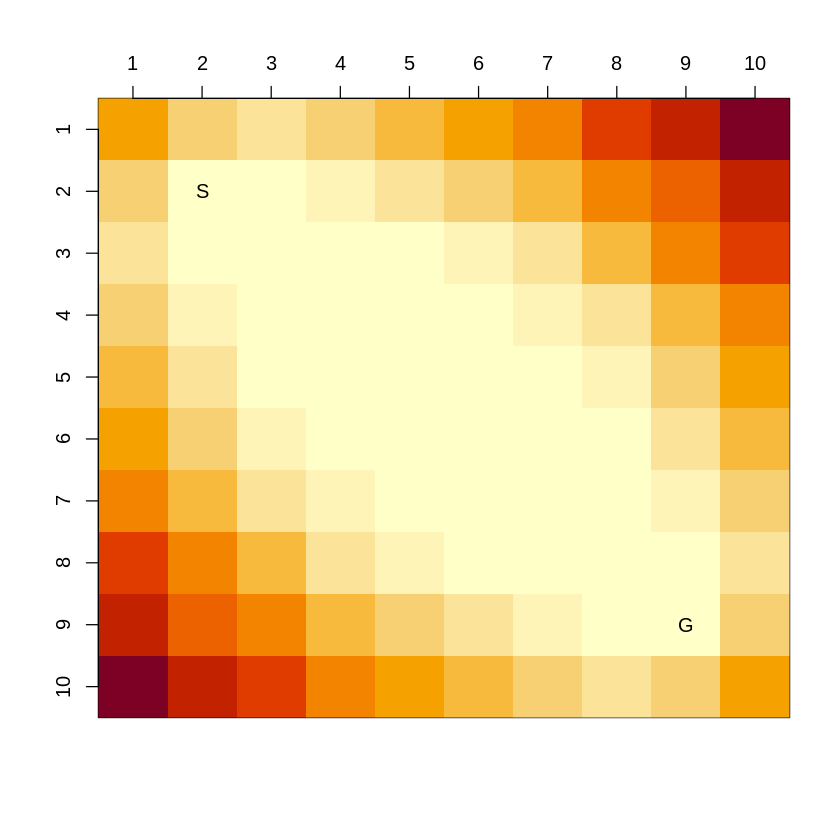

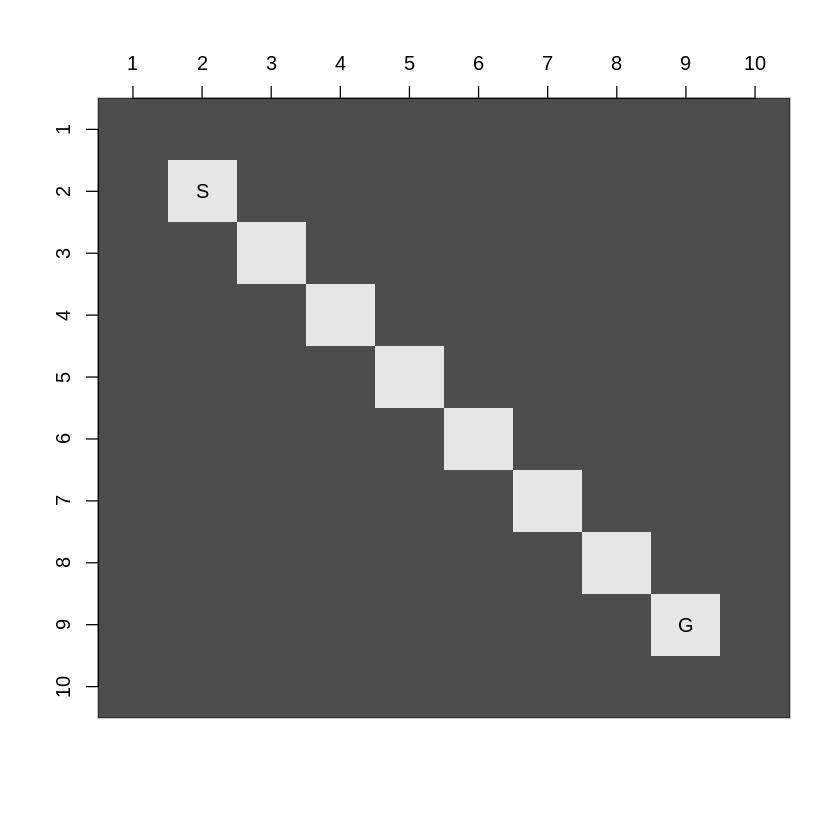

In [135]:
g_euclidean <- outer(1:n, 1:n, FUN = function(x,y) dist(cbind(x,y), start, method = "euclidean"))          
f <- g_euclidean + h_euclidean
f
                     
myimage(f)
                     
# the search will expand:
myimage(f <= f[goal], col = grey.colors(2))

Using Manhattan for the heuristic still works fine.

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,] 17.4 16.0 15.4 15.2 15.2 15.1 15.1 15.1 15.1  17.1
 [2,] 16.0 14.0 14.0 14.0 14.0 14.0 14.0 14.0 14.0  16.0
 [3,] 15.4 14.0 13.4 13.2 13.2 13.1 13.1 13.1 13.1  15.1
 [4,] 15.2 14.0 13.2 12.8 12.6 12.5 12.4 12.3 12.3  14.2
 [5,] 15.2 14.0 13.2 12.6 12.2 12.0 11.8 11.7 11.6  13.5
 [6,] 15.1 14.0 13.1 12.5 12.0 11.7 11.4 11.2 11.1  12.9
 [7,] 15.1 14.0 13.1 12.4 11.8 11.4 11.1 10.8 10.6  12.4
 [8,] 15.1 14.0 13.1 12.3 11.7 11.2 10.8 10.5 10.2  12.0
 [9,] 15.1 14.0 13.1 12.3 11.6 11.1 10.6 10.2  9.9  11.6
[10,] 17.1 16.0 15.1 14.2 13.5 12.9 12.4 12.0 11.6  13.3

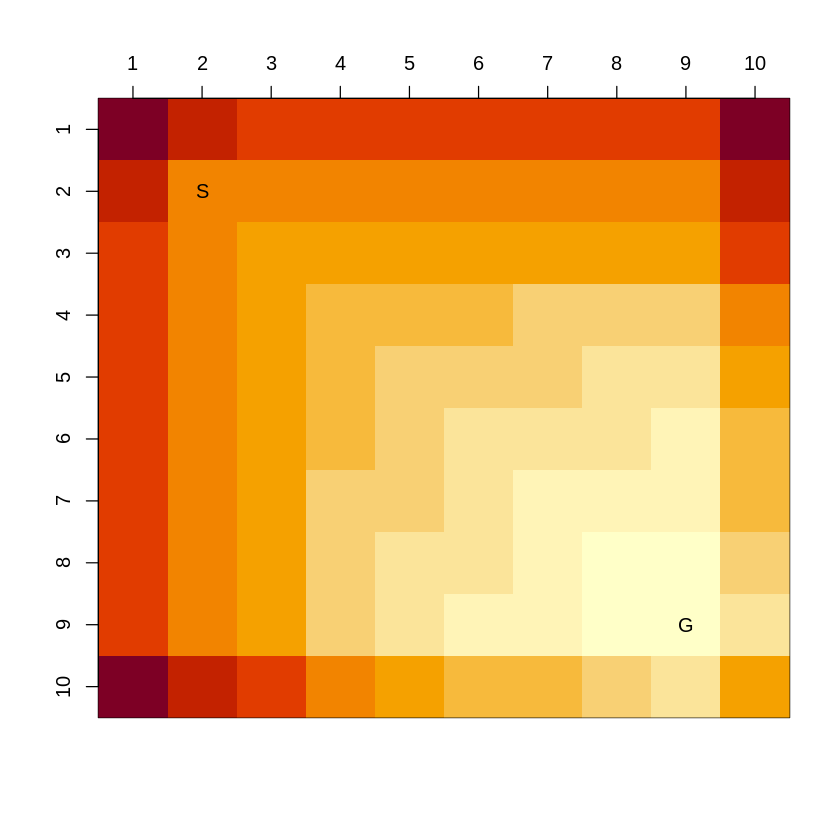

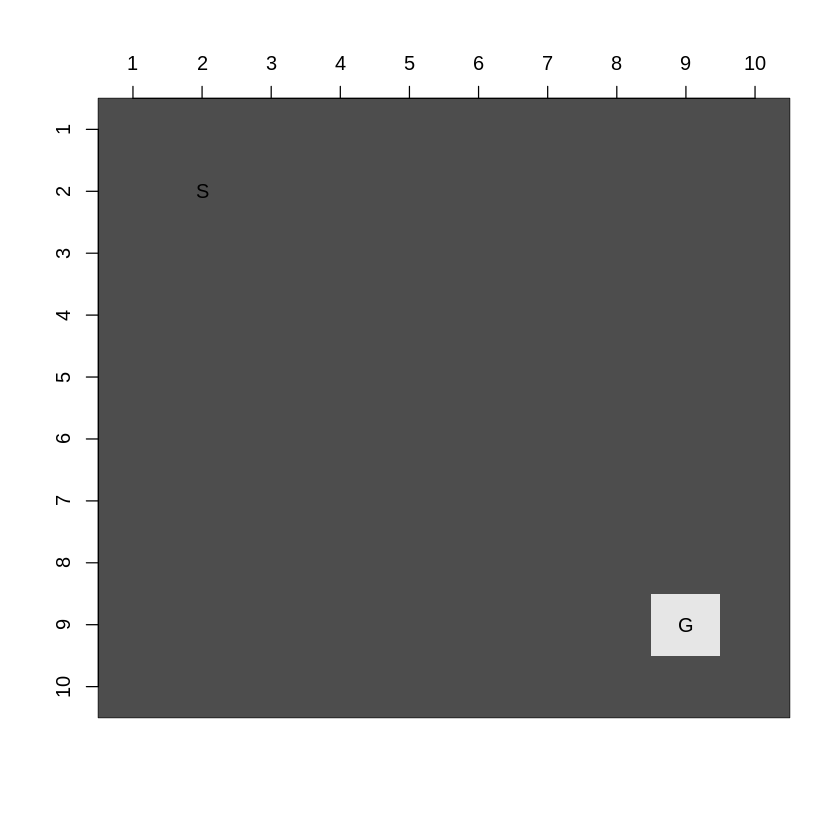

In [134]:
f <- g_euclidean + h_manhattan
f
                     
myimage(f)

myimage(f <= f[goal], col = grey.colors(2))